In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных с правильной кодировкой
try:
    df = pd.read_csv('kaggle_income.csv', encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv('kaggle_income.csv', encoding='latin-1')

# Предобработка данных
# Преобразование числовых колонок
numeric_cols = ['Mean', 'Median', 'Stdev', 'sum_w', 'ALand', 'AWater', 'Lat', 'Lon']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Преобразование категориальных данных
categorical_cols = ['State_Name', 'State_ab', 'County', 'City', 'Zip_Code', 'Area_Code']
df[categorical_cols] = df[categorical_cols].astype('category')


Пропущенные значения:
id            0
Area_Code     0
Stdev         0
Median        0
Mean          0
Lon           0
Lat           0
AWater        0
ALand         0
Zip_Code      0
State_Code    0
Primary       0
Type          0
Place         0
City          0
County        0
State_ab      0
State_Name    0
sum_w         0
dtype: int64

Статистики по доходам:
                Mean         Median          Stdev
count   32526.000000   32526.000000   32526.000000
mean    66703.986042   85452.938818   47273.695321
std     30451.194599   87810.895132   16555.486882
min         0.000000       0.000000       0.000000
25%     46015.500000   36046.250000   36075.000000
50%     60738.000000   51874.500000   46179.000000
75%     82223.500000   80915.000000   58078.000000
max    242857.000000  300000.000000  113936.000000


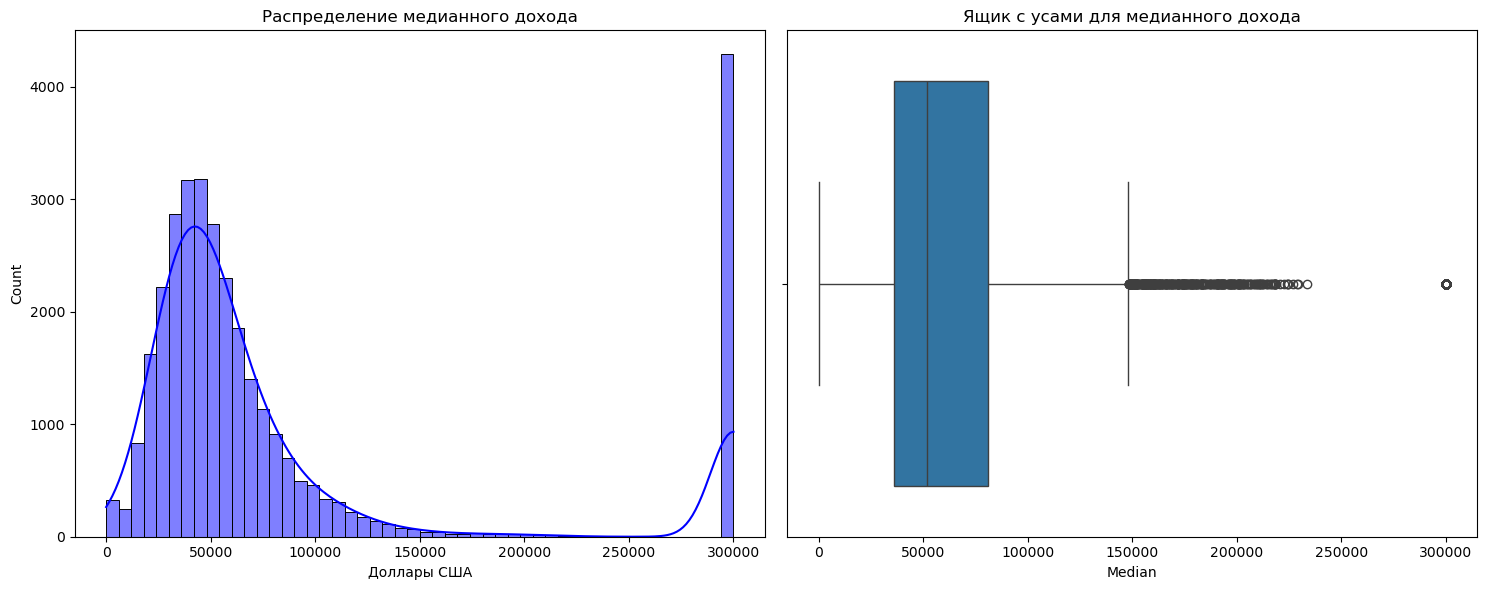

In [11]:
# Анализ пропущенных значений
print("Пропущенные значения:")
print(df.isnull().sum().sort_values(ascending=False))

# Основные статистики
print("\nСтатистики по доходам:")
print(df[['Mean', 'Median', 'Stdev']].describe())

# Визуализация распределения доходов
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Median'], bins=50, kde=True, color='blue')
plt.title('Распределение медианного дохода')
plt.xlabel('Доллары США')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Median'])
plt.title('Ящик с усами для медианного дохода')
plt.tight_layout()
plt.show()


C:\Users\d\AppData\Local\Temp\ipykernel_3052\3232340513.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette='viridis', legend=False)


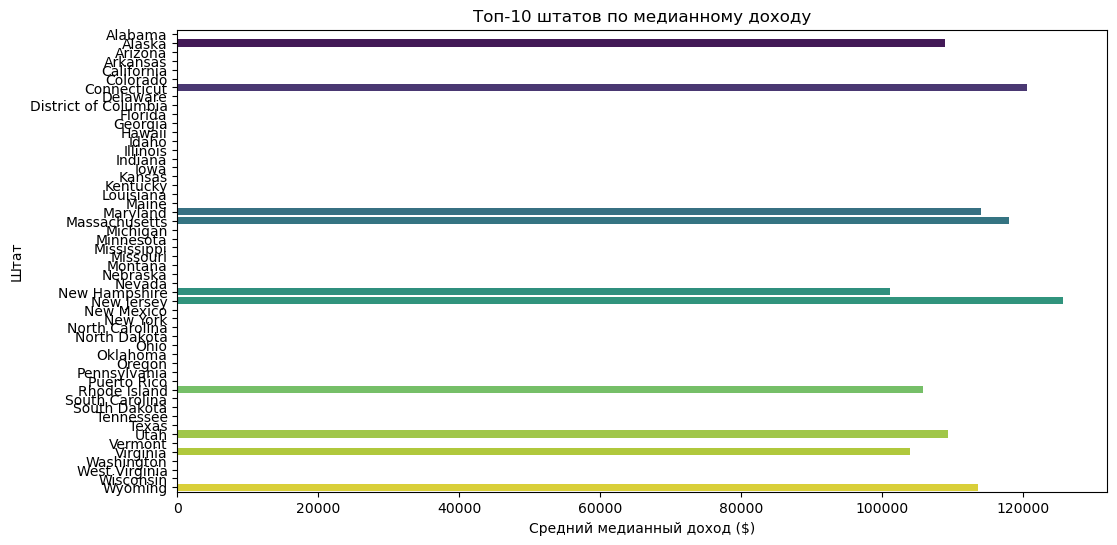

In [35]:
# Анализ по штатам
top_states = df.groupby('State_Name', observed=False)['Median'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_states.values, y=top_states.index, palette='viridis', legend=False)

plt.title('Топ-10 штатов по медианному доходу')
plt.xlabel('Средний медианный доход ($)')
plt.ylabel('Штат')
plt.show()


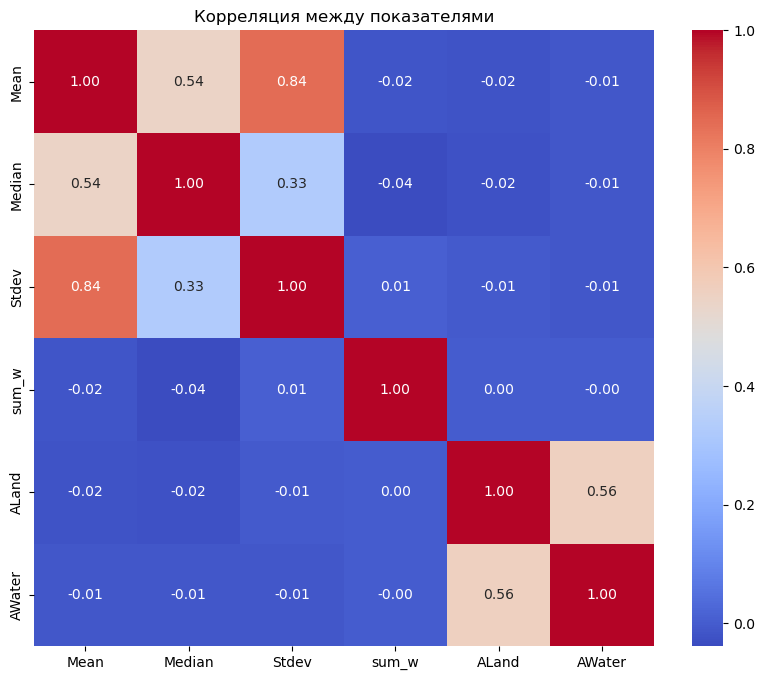


Топ-10 городов по медианному доходу:
                       Median        sum_w        Lat         Lon
City                                                             
Topsfield            300000.0  1111.571752  42.641379  -70.943440
Winnemucca           300000.0   127.224030  40.921603 -117.674305
Bradley Beach        300000.0   119.524124  40.201604  -74.012056
Mount Olivet         300000.0     7.000000  38.533567  -83.951689
Coopersburg          300000.0   686.152533  40.501531  -75.411990
West Sacramento      300000.0  1992.121951  38.592208 -121.517015
Mount Wolf           300000.0   164.291150  40.085859  -76.706609
Shenandoah Junction  300000.0   121.330581  39.353048  -77.837471
Presho               300000.0    12.299429  43.927267 -100.301123
Cooperstown          300000.0   143.330708  42.759222  -74.963200


C:\Users\d\AppData\Local\Temp\ipykernel_3052\1821948450.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city_analysis = df.groupby('City').agg({


In [17]:
# Корреляционный анализ
corr_matrix = df[['Mean', 'Median', 'Stdev', 'sum_w', 'ALand', 'AWater']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляция между показателями')
plt.show()

# Анализ городских показателей
city_analysis = df.groupby('City').agg({
    'Median': 'mean',
    'sum_w': 'sum',
    'Lat': 'first',
    'Lon': 'first'
}).sort_values('Median', ascending=False).head(10)

print("\nТоп-10 городов по медианному доходу:")
print(city_analysis)

In [ ]:
Вот реализация экспертной системы для классификации семей с использованием продукционных правил и обратного вывода:

In [47]:
import pandas as pd
from typing import Dict, Optional

class FamilyClassifier:
    def __init__(self, data_path: str, **read_csv_kwargs):
        """Инициализация с поддержкой параметров чтения CSV"""
        try:
            # Пробуем загрузить с указанной кодировкой
            self.df = pd.read_csv(data_path, **read_csv_kwargs)
        except UnicodeDecodeError as e:
            # Если ошибка кодировки, пробуем latin-1
            print(f"Ошибка кодировки: {e}. Пробуем latin-1...")
            self.df = pd.read_csv(data_path, encoding='latin-1', **{k:v for k,v in read_csv_kwargs.items() if k != 'encoding'})
            
        self.city_stats = self._calculate_city_stats()
        
    def _calculate_city_stats(self) -> Dict[str, Dict]:
        """Рассчитываем статистики по городам"""
        return self.df.groupby('City').agg({
            'Median': 'median',
            'Mean': 'mean',
            'ALand': 'median',
            'AWater': 'median'
        }).to_dict('index')

    def _get_city_thresholds(self, city: str) -> Optional[Dict]:
        """Получаем пороговые значения для города"""
        return self.city_stats.get(city)

    def _check_condition(self, family: pd.Series, thresholds: Dict, rules: list) -> bool:
        """Рекурсивная проверка условий"""
        for condition in rules:
            if isinstance(condition, list):
                if all(self._check_condition(family, thresholds, condition)):
                    return True
            else:
                field, op, value = condition
                family_val = family[field]
                threshold_val = thresholds[value] if isinstance(value, str) else value
                
                if op == '>' and family_val > threshold_val:
                    continue
                elif op == '<' and family_val < threshold_val:
                    continue
                elif op == '>=' and family_val >= threshold_val:
                    continue
                elif op == '<=' and family_val <= threshold_val:
                    continue
                else:
                    return False
        return True

    def classify_family(self, family: pd.Series) -> str:
        """Основной метод классификации с обратным выводом"""
        thresholds = self._get_city_thresholds(family['City'])
        if not thresholds:
            return "Недостаточно данных по городу"
        
        # Правила классификации (можно расширять)
        rules = {
            'Обеспеченная': [
                [('Median', '>', 2.0*thresholds['Median']),
                 ('ALand', '>', 1.5*thresholds['ALand'])],
                [('Mean', '>', 2.5*thresholds['Mean'])]
            ],
            'Средний класс': [
                [('Median', '>=', thresholds['Median']),
                 ('Median', '<=', 2.0*thresholds['Median'])],
                [('ALand', '>=', 0.8*thresholds['ALand']),
                 ('ALand', '<=', 1.5*thresholds['ALand'])]
            ],
            'Бедная': [
                [('Median', '<', thresholds['Median']),
                 ('Median', '>=', 0.5*thresholds['Median'])]
            ],
            'За гранью бедности': [
                [('Median', '<', 0.5*thresholds['Median'])],
                [('ALand', '<', 0.3*thresholds['ALand'])]
            ]
        }

        # Обратный вывод (проверка от высшего класса к низшему)
        for category in ['Обеспеченная', 'Средний класс', 'Бедная', 'За гранью бедности']:
            for rule_set in rules[category]:
                if self._check_condition(family, thresholds, rule_set):
                    return category
                
        return "Не определено"



In [49]:
if __name__ == "__main__":
    classifier = FamilyClassifier(
        'kaggle_income.csv',
        encoding='latin-1',
        sep=',',
        usecols=['City', 'Median', 'Mean', 'ALand', 'AWater']
    )
    
    test_family = pd.Series({
        'City': 'New York',
        'Median': 85000,
        'Mean': 95000,
        'ALand': 1500,
        'AWater': 200
    })
    
    result = classifier.classify_family(test_family)
    print(f"Категория семьи: {result}")

Категория семьи: Средний класс
